In [8]:
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
import json
sys.path.append('/Applications/CPLEX_Studio221/cplex/python/3.7/x86-64_osx/cplex/_internal')
sys.path.append('/Users/xinyuhuangmac/Google Drive/Stage/code_pb_ve/src')
sys.path.append('/Users/xinyuhuangmac/Google Drive/Stage/code_pb_ve/data')
import py37_cplex2210 as cplex
from generator import *

In [9]:
%reload_ext autoreload
%autoreload 2
from frontal_algo import *
from Frank_Wolfe_ev import *
from Frank_Wolfe_st import *
from tools import *
K=100
nk=20

In [10]:
N=50
instance_json(N)
my_instance = "../data/instance_" + str(N) + ".json"
np.random.seed(0)
stochastic = Frank_Wolfe_Stochastic(my_instance)

In [11]:
np.random.seed(0)
x_bar_k,df=stochastic.FW_solve(actual_time, analyse=True, K=K, nk=nk)

  0%|          | 0/100 [00:00<?, ?iteration/s]

KeyboardInterrupt: 

In [28]:
stochastic.affichage(x_bar_k)

alpha: 0.01 Beta_min: 10000 Beta_max: 10000 Gamma: 100
------------------------------------------------------
t	 charge net bl	 charge net up	 y_t^up/N 	 Ecart de Service
0 	 6176.0 	 -1200.0 	 7000.0 	 376.0
1 	 3840.0 	 -3600.0 	 7000.0 	 440.0
2 	 4900.0 	 -1800.0 	 7000.0 	 -300.0
3 	 1565.0 	 -6000.0 	 7000.0 	 565.0
4 	 7784.0 	 600.0 	 7000.0 	 184.0
5 	 1623.0 	 -6000.0 	 7000.0 	 623.0
6 	 7713.0 	 600.0 	 7000.0 	 113.0
7 	 3312.0 	 -3915.0 	 7000.0 	 226.0
8 	 7200.0 	 -58.0 	 7000.0 	 258.0
9 	 7280.0 	 285.0 	 7000.0 	 -5.0
------------------------------------------------------
f_val: 12970.021788046952 neg_pos_part: 6.672293957801477 cost_electricity: 1284.8468059229956 soc: 82082.2815257618
value of the objective function: 96343.82241368956
------------------------------------------------------
t	 s_i_min	 s_i_T	 s_i_max
------------------------------------------------------
Vehicle  0 	 S_i_T: 30000.0 	
S_i_min: [    0.             0.             0.             0.
     

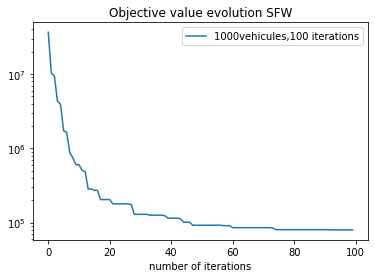

In [25]:
plt.plot([x for x in range(100)], df['best_score'].values, label='1000vehicules,100 iterations')
# Add a title and axis labels
plt.title('Objective value evolution SFW')
plt.xlabel('number of iterations')
#plt.ylabel('y')

#for i in range(len(x)):
#    #plt.plot(x[i], mean0[i], 'b.')
 #   plt.plot(x[i], mean1[i], 'o',markersize=3,color='orange') 
  #  plt.plot(x[i], mean2[i], 'gv',markersize=3) 
#plt.ylim(0, 1000000)
# Add a legend
plt.yscale('log')

plt.legend()

# Show the plot
plt.show()

In [4]:
standard = Frank_Wolfe_Standard(my_instance)

In [5]:
np.random.seed(0)
x_bar_k_1,df_1=standard.FW_st_solve(actual_time, analyse=True, K=K, nk=nk)

100%|██████████| 100/100 [00:54<00:00,  1.84iteration/s]

Gap primal dual :  171870.32693259677
Objective value is :  9777.01987824531


In [7]:
standard.affichage(x_bar_k_1)

alpha: 0.01 Beta_min: 10000 Beta_max: 10000 Gamma: 100
------------------------------------------------------
t	 charge net bl	 charge net up	 y_t^up/N 	 Ecart de Service
0 	 7576.0 	 -12222.0 	 20000.0 	 -203.0
1 	 7121.0 	 -12905.0 	 20000.0 	 27.0
2 	 8273.0 	 -11756.0 	 20000.0 	 29.0
3 	 8680.0 	 -11349.0 	 20000.0 	 28.0
4 	 8254.0 	 -11670.0 	 20000.0 	 -75.0
5 	 8447.0 	 -11598.0 	 20000.0 	 44.0
6 	 8754.0 	 -11171.0 	 20000.0 	 -75.0
7 	 7950.0 	 -12101.0 	 20000.0 	 51.0
8 	 8948.0 	 -11038.0 	 20000.0 	 -14.0
9 	 7208.0 	 -12676.0 	 20000.0 	 -116.0
------------------------------------------------------
f_val: 729.513900010125 neg_pos_part: 0.0 cost_electricity: 2030.2656622830564 soc: 7017.240315952126
value of the objective function: 9777.019878245308
------------------------------------------------------
t	 s_i_min	 s_i_T	 s_i_max
------------------------------------------------------
Vehicle  0 	 S_i_T: 21816.450005248753 	
S_i_min: [    0.             0.             0.

In [15]:
x_bar_k_1,df_1=standard.FW_st_solve(actual_time, analyse=True, K=200, nk=nk, n_pre=50)

100%|██████████| 200/200 [39:02<00:00, 11.71s/iteration]

Gap primal dual :  76435.0553915023
Objective value is :  98777.85300834985


In [16]:
standard.affichage(x_bar_k_1)

alpha: 0.01 Beta_min: 10000 Beta_max: 10000 Gamma: 100
------------------------------------------------------
t	 charge net bl	 charge net up	 y_t^up/N 	 Ecart de Service
0 	 5500.0 	 -1592.0 	 7000.0 	 92.0
1 	 6058.0 	 -1153.0 	 7000.0 	 211.0
2 	 5112.0 	 -2024.0 	 7000.0 	 136.0
3 	 755.0 	 -6253.0 	 7000.0 	 8.0
4 	 5664.0 	 -1482.0 	 7000.0 	 146.0
5 	 5918.0 	 -1200.0 	 7000.0 	 118.0
6 	 6056.0 	 -1061.0 	 7000.0 	 116.0
7 	 5926.0 	 -1200.0 	 7000.0 	 126.0
8 	 -1195.0 	 -8231.0 	 7000.0 	 36.0
9 	 5911.0 	 -1326.0 	 7000.0 	 238.0
------------------------------------------------------
f_val: 1941.9967736536425 neg_pos_part: 0.0 cost_electricity: 1142.631989922984 soc: 95693.22424477455
value of the objective function: 98777.85300835117
------------------------------------------------------
t	 s_i_min	 s_i_T	 s_i_max
------------------------------------------------------
Vehicle  0 	 S_i_T: 18413.08303451405 	
S_i_min: [    0.            0.            0.            0.         

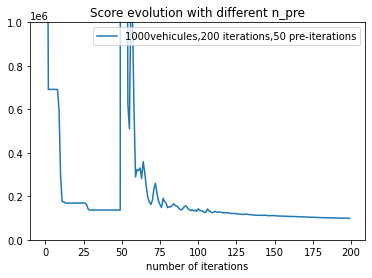

In [17]:
plt.plot([x for x in range(200)], df_1['best_score'].values, label='1000vehicules,200 iterations,50 pre-iterations')
# Add a title and axis labels
plt.title('Score evolution with different n_pre')
plt.xlabel('number of iterations')
#plt.ylabel('y')

#for i in range(len(x)):
#    #plt.plot(x[i], mean0[i], 'b.')
 #   plt.plot(x[i], mean1[i], 'o',markersize=3,color='orange') 
  #  plt.plot(x[i], mean2[i], 'gv',markersize=3) 
plt.ylim(0, 1000000)
# Add a legend
plt.legend()

# Show the plot
plt.show()

In [18]:
x_bar_k_1,df_1=standard.FW_st_solve(actual_time, analyse=True, K=200, nk=nk, n_pre=100)

100%|██████████| 200/200 [40:31<00:00, 12.16s/iteration]

Gap primal dual :  135772.14991757047
Objective value is :  112847.76573401708


In [20]:
standard.affichage(x_bar_k_1)

alpha: 0.01 Beta_min: 10000 Beta_max: 10000 Gamma: 100
------------------------------------------------------
t	 charge net bl	 charge net up	 y_t^up/N 	 Ecart de Service
0 	 4624.0 	 -2464.0 	 7000.0 	 87.0
1 	 5795.0 	 -1383.0 	 7000.0 	 178.0
2 	 4085.0 	 -2979.0 	 7000.0 	 65.0
3 	 -162.0 	 -7263.0 	 7000.0 	 101.0
4 	 4791.0 	 -2411.0 	 7000.0 	 202.0
5 	 5572.0 	 -1560.0 	 7000.0 	 132.0
6 	 5526.0 	 -1657.0 	 7000.0 	 183.0
7 	 5630.0 	 -1516.0 	 7000.0 	 146.0
8 	 -1158.0 	 -8211.0 	 7000.0 	 53.0
9 	 5447.0 	 -1792.0 	 7000.0 	 239.0
------------------------------------------------------
f_val: 2263.753641664895 neg_pos_part: 0.0 cost_electricity: 1003.7617287345773 soc: 109580.25036361665
value of the objective function: 112847.76573401612
------------------------------------------------------
t	 s_i_min	 s_i_T	 s_i_max
------------------------------------------------------
Vehicle  0 	 S_i_T: 17309.83710033373 	
S_i_min: [    0.            0.            0.            0.     

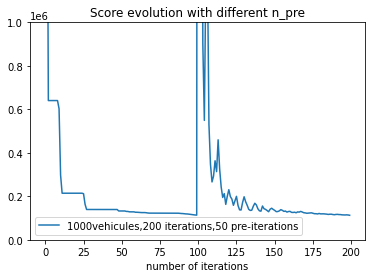

In [21]:
plt.plot([x for x in range(200)], df_1['best_score'].values, label='1000vehicules,200 iterations,50 pre-iterations')
# Add a title and axis labels
plt.title('Score evolution with different n_pre')
plt.xlabel('number of iterations')
#plt.ylabel('y')

#for i in range(len(x)):
#    #plt.plot(x[i], mean0[i], 'b.')
 #   plt.plot(x[i], mean1[i], 'o',markersize=3,color='orange') 
  #  plt.plot(x[i], mean2[i], 'gv',markersize=3) 
plt.ylim(0, 1000000)
# Add a legend
plt.legend()

# Show the plot
plt.show()

In [36]:
frontal = Frontal(my_instance,actual_time)

In [37]:
np.random.seed(0)
result,s_t_min,soc_max = frontal.Frontal_solve(actual_time)

Minimize
obj1: - 0.2 s_bl_0_10 + 0.0005 c_bl_0_1 + 0.0005 c_bl_0_2 + 0.0005 c_bl_0_3
+ 0.0005 c_bl_0_4 + 0.0005 c_bl_0_5 + 0.0005 c_bl_0_6 + 0.0005 c_bl_0_7
+ 0.0005 c_bl_0_8 + 0.0005 c_bl_0_9 + 0.0005 c_bl_0_10 - 0.0005 d_bl_0_1
- 0.0005 d_bl_0_2 - 0.0005 d_bl_0_3 - 0.0005 d_bl_0_4 - 0.0005 d_bl_0_5
- 0.0005 d_bl_0_6 - 0.0005 d_bl_0_7 - 0.0005 d_bl_0_8 - 0.0005 d_bl_0_9
- 0.0005 d_bl_0_10 - 0.2 s_bl_1_10 + 0.0005 c_bl_1_1 + 0.0005 c_bl_1_2
+ 0.0005 c_bl_1_3 + 0.0005 c_bl_1_4 + 0.0005 c_bl_1_5 + 0.0005 c_bl_1_6
+ 0.0005 c_bl_1_7 + 0.0005 c_bl_1_8 + 0.0005 c_bl_1_9 + 0.0005 c_bl_1_10
- 0.0005 d_bl_1_1 - 0.0005 d_bl_1_2 - 0.0005 d_bl_1_3 - 0.0005 d_bl_1_4
- 0.0005 d_bl_1_5 - 0.0005 d_bl_1_6 - 0.0005 d_bl_1_7 - 0.0005 d_bl_1_8
- 0.0005 d_bl_1_9 - 0.0005 d_bl_1_10 - 0.2 s_bl_2_10 + 0.0005 c_bl_2_1
+ 0.0005 c_bl_2_2 + 0.0005 c_bl_2_3 + 0.0005 c_bl_2_4 + 0.0005 c_bl_2_5
+ 0.0005 c_bl_2_6 + 0.0005 c_bl_2_7 + 0.0005 c_bl_2_8 + 0.0005 c_bl_2_9
+ 0.0005 c_bl_2_10 - 0.0005 d_bl_2_1 - 0.0005 d_bl_

In [38]:
frontal.affichage(result)

alpha: 0.01 Beta_min: 10000 Beta_max: 10000 Gamma: 100
------------------------------------------------------
t	 charge net bl	 charge net up	 y_t^up/N 	 Ecart de Service
0 	 6953.0 	 -47.0 	 7000.0 	 0.0
1 	 5772.0 	 -1228.0 	 7000.0 	 0.0
2 	 4429.0 	 -2571.0 	 7000.0 	 0.0
3 	 6400.0 	 -600.0 	 7000.0 	 0.0
4 	 8421.0 	 1421.0 	 7000.0 	 0.0
5 	 11800.0 	 4800.0 	 7000.0 	 -0.0
6 	 12024.0 	 5024.0 	 7000.0 	 -0.0
7 	 10064.0 	 3064.0 	 7000.0 	 0.0
8 	 11664.0 	 4664.0 	 7000.0 	 -0.0
9 	 6700.0 	 -300.0 	 7000.0 	 -0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[0. 0. 0